### Author: Bernardo Villalba Frias
### Email: b.r.villalba.frias@hva.nl

# Quantum Programming 2
## Introduction to Qiskit

This notebook is a extension to the brief introduction to the IBM Qiskit package covered in the Quantum Programming 1 lesson. The IBM Qiskit framework offers a huge variety of very interesting functionalities to explore. This workshop will require you to investigate about the proper usage of the tool. Please refer to the [IBM Quantum Documentation](https://qiskit.org/documentation/).

As expected, this workshop is aimed to be a starting point for you in the Qiskit environment. During the minor, we will cover some additional features of the framework and you will have the opportunity of implementing and testing your own quantum circuits, allowing you to improve and increase your knowledge of Qiskit and Quantum Computing in general.

However, Qiskit is not the only quantum programming environment. There are several other options for you to explore, for instance: [Quantum Inspire](https://www.quantum-inspire.com/), [Cirq](https://quantumai.google/cirq), [Q#](https://quantum.microsoft.com/en-us/explore/concepts/qsharp), etc.. Moreover there are multiple software frameworks that offer extensions for quantum computing, for instance: [PennyLane](https://pennylane.ai/), [Yao](https://yaoquantum.org/), [OpenFermion](https://quantumai.google/openfermion), etc.

The idea of this workshop is that you will implement, simulate and analyze some of the features of the Qiskit package, by means of a set of exercises.

## Python environment


In [ ]:
from qiskit.quantum_info import Statevector

In [ ]:
# Function: obtain_vector(quantum_circuit)
#
# 
# This function accepts an arbitrary circuit, performs its state vector simulation and 
# returns the resulting vector state as a [x, y, z] vector that could be plotted
def obtain_vector(qc):

    # Execute the state vector simulation
    resulting_vector = Statevector(qc)

    return resulting_vector


# Function: simulate_circuit_and_obtain_vector(quantum_circuit, number_shots)
#
# 
# This function accepts an arbitrary circuit, performs its state vector simulation for
# a number of trials, collects the sample counts and the resulting probabilities and
# returns the resulting vector state as a [x, y, z] vector that could be plotted
def simulate_circuit_and_obtain_vector(qc, trials = 10000):

    # Execute the state vector simulation
    resulting_vector = Statevector(qc)

    # Execute the simulation for a number of trials (10000 per deault)
    counts = resulting_vector.sample_counts(shots = trials)

    # Collect the results from the job
    probabilities = resulting_vector.probabilities()

    return resulting_vector, counts, probabilities



## Exercise 1: A bit more complicated circuit

During the lesson: A One Qubit World, we presented various quantum gates such as the Pauli gates: [X gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#x), [Y gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#y) and [Z gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#z), the [Hadamard gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#h), and the [Phase gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#s). Single-qubit quantum gates are an important part of Qiskit, hence we will start using them into a more complex circuit.

As you may understand, the goal of this workshop is not to present every single gate that you could use in your circuits. However, as you would see, there is a big similarity in the way of using the different quantum gates within a quantum circuit.

In the following exercise you will implement a simple quantum circuit, will perform the simulation, present the results and plot the intermediate quantum states. The circuit is the following:

![Exercise1](img/exercise1.png)

Circuit for HZ (with measurement):
     ┌───┐┌───┐┌─┐
  q: ┤ H ├┤ Z ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 

Unitary matrix of HZ (no measurement):
[[ 0.70710678+0.j  0.70710678+0.j]
 [-0.70710678+0.j  0.70710678+0.j]]

Statevector amplitudes (alpha, beta):
[ 0.70710678+0.j -0.70710678+0.j]

Probabilities:
{np.str_('0'): np.float64(0.4999999999999999), np.str_('1'): np.float64(0.4999999999999999)}

Sampled counts (1024 shots):
{np.str_('0'): np.int64(510), np.str_('1'): np.int64(514)}


<Figure size 640x480 with 0 Axes>

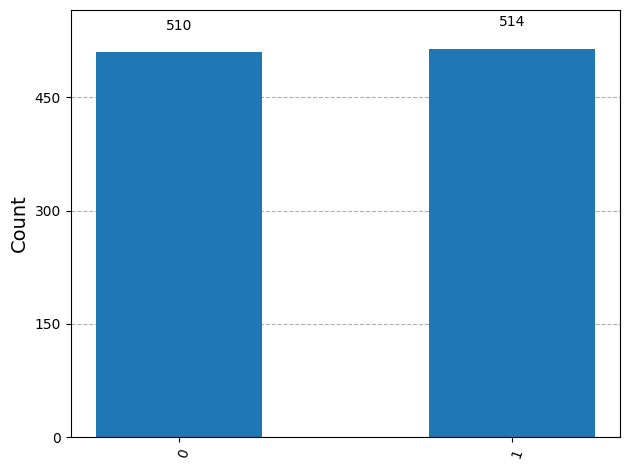

<Figure size 640x480 with 0 Axes>

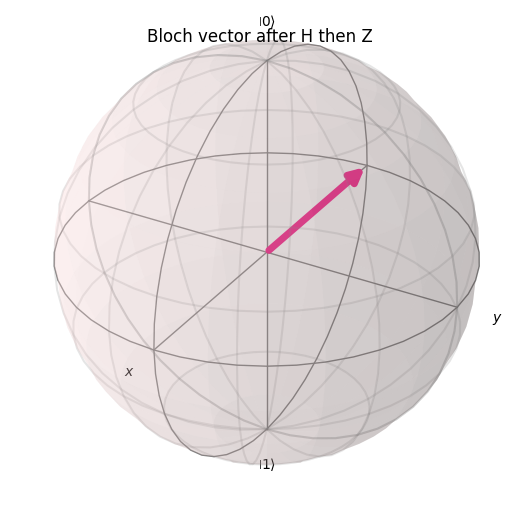

In [8]:
%matplotlib inline

from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import plot_histogram, plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt

# Build the circuit (with classical register for measurement)
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.z(0)
qc.measure(0, 0)

# Build a copy without the measurement so we can obtain the statevector/unitary
qc_no_measure = QuantumCircuit(1)
qc_no_measure.h(0)
qc_no_measure.z(0)

unitary = Operator(qc_no_measure).data

print("Circuit for HZ (with measurement):")
print(qc)

print("\nUnitary matrix of HZ (no measurement):")
print(unitary)

# Obtain the statevector before measurement
sv = Statevector(qc_no_measure)
print("\nStatevector amplitudes (alpha, beta):")
print(sv.data)

# Get probabilities and sampled counts (as if measured) using the statevector sampler
probs = sv.probabilities_dict()
counts = sv.sample_counts(shots=1024)
print("\nProbabilities:")
print(probs)
print("\nSampled counts (1024 shots):")
print(counts)

# Plot histogram of sampled counts
plt.figure()
plot_histogram(counts)
plt.show()

# Compute Bloch vector from single-qubit amplitudes [alpha, beta]
alpha, beta = sv.data
bloch_x = 2 * np.real(alpha * np.conj(beta))
bloch_y = 2 * np.imag(beta * np.conj(alpha))
bloch_z = np.abs(alpha)**2 - np.abs(beta)**2
bloch = [bloch_x, bloch_y, bloch_z]

# Plot Bloch vector
plt.figure()
plot_bloch_vector(bloch)
plt.title("Bloch vector after H then Z")
plt.show()


## Exercise 6: Multi-qubit gates

Until now, we have been working on multi-qubit systems, but operating on each qubit separately. Our gates have been applied to single qubits at every time. Let's move to a scenario involving multi-qubit gates (one gate acting on two qubits at the same time)

You will implement the following quantum circuit (preparing a Bell state, remember), run the simulation and plot the histogram

![Exercise2](img/exercise2.png)

Index: 2
Register: [(QuantumRegister(1, 'qreg2'), 0)]
Unitary matrix of the circuit (without measurement):
Statevector amplitudes (alpha, beta, gamma, delta):
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Probabilities:
{np.str_('00'): np.float64(0.4999999999999999), np.str_('11'): np.float64(0.4999999999999999)}
Sampled counts (1024 shots):
{np.str_('00'): np.int64(518), np.str_('11'): np.int64(506)}


<Figure size 640x480 with 0 Axes>

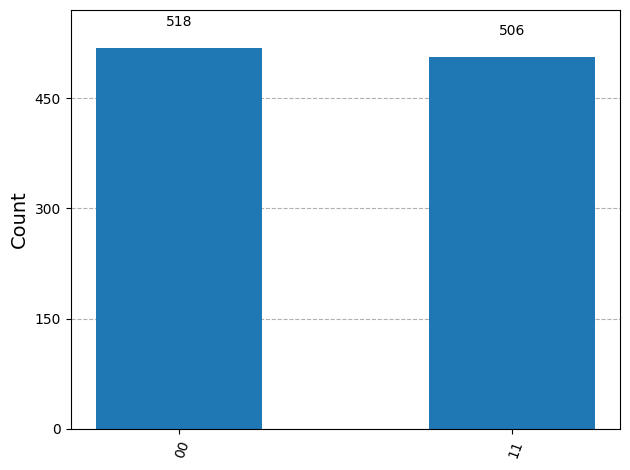

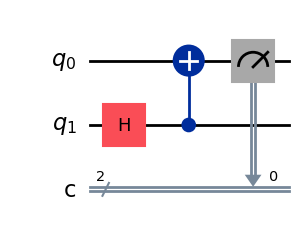

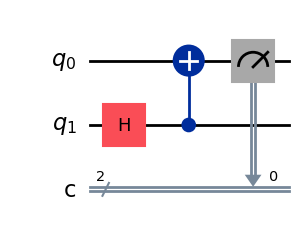

In [30]:
%matplotlib inline

from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
 
qc = QuantumCircuit(2, 2)
qc.qubits

qr1 = QuantumRegister(2, "qreg1")  # Create a QuantumRegister with 2 qubits
qr2 = QuantumRegister(1, "qreg2")  # Create a QuantumRegister with 1 qubit
cr1 = ClassicalRegister(3, "creg1")  # Create a ClassicalRegister with 3 cbits
 
combined_circuit = QuantumCircuit(
    qr1, qr2, cr1
)  # Create a quantum circuit with 2 QuantumRegisters and 1 ClassicalRegister
combined_circuit.qubits


# Find the index and registers of a specific qubit in the combined circuit
desired_qubit = qr2[0]  # Qubit 0 of register 'qreg2'

print("Index:", combined_circuit.find_bit(desired_qubit).index)
print("Register:", combined_circuit.find_bit(desired_qubit).registers)

qc.h(1)  # Add H-gate to qubit 1
qc.cx(1, 0)  # Add CNOT with control qubit 1 and target qubit 0

qc.measure(0, 0)  # Measure qubit 0 into classical bit 0

qc_no_measure = QuantumCircuit(2)
qc_no_measure.h(1)
qc_no_measure.cx(1, 0)

unitary = Operator(qc_no_measure).data
print("Unitary matrix of the circuit (without measurement):")

sv = Statevector(qc_no_measure)
print("Statevector amplitudes (alpha, beta, gamma, delta):")
print(sv.data)

probs = sv.probabilities_dict()
counts = sv.sample_counts(shots=1024)

print("Probabilities:")
print(probs)
print("Sampled counts (1024 shots):")
print(counts)

plt.figure()
plot_histogram(counts)
plt.show()

qc.draw("mpl")

## Exercise 3: Plotting entangled states

When we plotted the multi-qubit system from the Qiskit Introduction notebook (`Example 4`), we kind of knew what to expect. Each qubit was independently affected by a quantum gate; hence, the resulting state of each qubit was shown in its "own" Bloch sphere. But, what happend when you deal with entangled states? Try plotting on the Bloch sphere the circuit from the previous exercise (`Exercise 2`).

Statevector amplitudes:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Bloch vector qubit 0: [np.float64(0.0), np.float64(0.0), np.float64(0.0)]
Bloch vector qubit 1: [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


<Figure size 400x400 with 0 Axes>

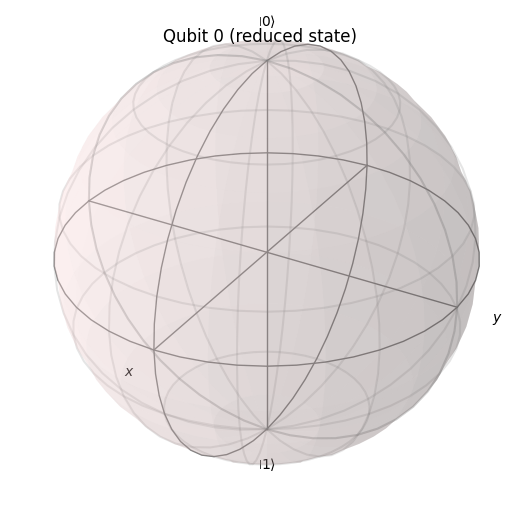

<Figure size 400x400 with 0 Axes>

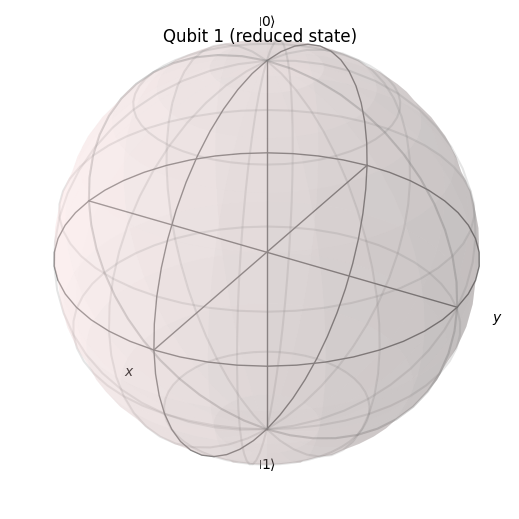

In [2]:
%matplotlib inline

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix, partial_trace
from qiskit.visualization import plot_bloch_vector, plot_state_qsphere
import numpy as np
import matplotlib.pyplot as plt

# Recreate the Bell-state circuit from Exercise 2
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1, 0)

# Obtain the statevector
sv = Statevector(qc)
print('Statevector amplitudes:')
print(sv.data)

# Convert to density matrix
dm = DensityMatrix(sv)

# Compute reduced density matrices (trace out the other qubit)
rho_q0 = partial_trace(dm, [1])
rho_q1 = partial_trace(dm, [0])

# Pauli matrices
px = np.array([[0, 1], [1, 0]])
py = np.array([[0, -1j], [1j, 0]])
pz = np.array([[1, 0], [0, -1]])

def bloch_from_rho(rho):
    mat = rho.data if hasattr(rho, 'data') else np.asarray(rho)
    x = np.real(np.trace(mat @ px))
    y = np.real(np.trace(mat @ py))
    z = np.real(np.trace(mat @ pz))
    return [x, y, z]

bloch0 = bloch_from_rho(rho_q0)
bloch1 = bloch_from_rho(rho_q1)

print('Bloch vector qubit 0:', bloch0)
print('Bloch vector qubit 1:', bloch1)

# Plot Bloch spheres
plt.figure(figsize=(4,4))
plot_bloch_vector(bloch0)
plt.title('Qubit 0 (reduced state)')

plt.figure(figsize=(4,4))
plot_bloch_vector(bloch1)
plt.title('Qubit 1 (reduced state)')

plt.show()

What happened? In the single-qubit case, the position of the Bloch vector along an axis nicely corresponds to the expectation value of measuring in that basis. Considering this approach, when dealing with entangled states, there is no single-qubit measurement basis for which a specific measurement is guaranteed, that would miss the important effect of correlation between the qubits.

We cannot distinguish between different entangled states. For example, the two states: $\ket{\Phi^{+}}$ and $\ket{\Psi^{+}}$ will look the same on two separate Bloch spheres, despite being very different states with different measurement outcomes.

How else could we visualize this statevector? This statevector is simply a collection of four amplitudes (complex numbers), and there are endless ways we can map this to an image. One such visualization is the [Q-sphere](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.visualization.plot_state_qsphere). Here each amplitude is represented by a blob on the surface of a sphere. The size of the blob is proportional to the magnitude of the amplitude, and the colour is proportional to the phase of the amplitude. The amplitudes for $\ket{00}$ and $\ket{11}$ are equal, and all other amplitudes are 0:

<Figure size 640x480 with 0 Axes>

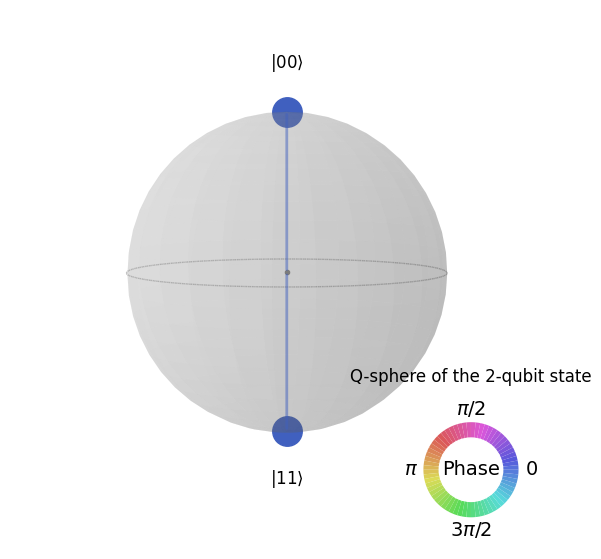

In [3]:
# Q-sphere for the full 2-qubit state
plt.figure()
plot_state_qsphere(sv)
plt.title('Q-sphere of the 2-qubit state')
plt.show()

## Exercise 4: Transpiling

As mentioned during the lessons, the circuits that we build and run using Qiskit are basically simulations of quantum computers. As any simulation, it is just a representation of a real system. In this case, the real quantum processors are not accessible to us. We just have to submit our circuits and IBM will execute them in an actual quantum processor.

However, those quantum processors have different capabilities: topologies, number of qubits, available gates, decoherence times, etc.. In this scenario depending on the selected quantum processor, the resulting circuit will be different. Let's try to use the [transpile](https://docs.quantum.ibm.com/api/qiskit/compiler#transpile) command to obtained the resulting transpiled circuit.

Implement and draw the following quantum circuit:

![Exercise4](img/exercise4.png)


Original circuit (no measurement):


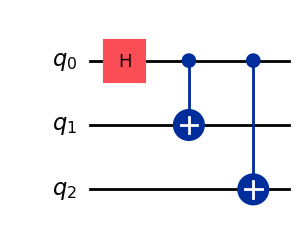

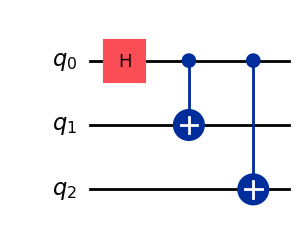

In [9]:
%matplotlib inline

from qiskit import QuantumCircuit, transpile
import matplotlib.pyplot as plt

# Build the 3-qubit circuit: H on q0, CNOT 0->1, CNOT 0->2, measure all
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([0,1,2], [0,1,2])

# Also build a non-measure version for transpilation/state inspection
qc_no_measure = QuantumCircuit(3)
qc_no_measure.h(0)
qc_no_measure.cx(0, 1)
qc_no_measure.cx(0, 2)

print('Original circuit (no measurement):')
display(qc_no_measure.draw('mpl'))

Select a [Fake Provider](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/fake_provider) as the backend to "run" your circuit. You can choose any fake provider (or even multiple ones, to see if you can find any difference). Transpile your circuit and draw the resulting circuit. Using the [target](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.fake_provider.FakeAthensV2#target) command, you could see some of the capabilities that the specific backend provides.

Using fake backend: GenericBackendV2
Transpiled circuit:


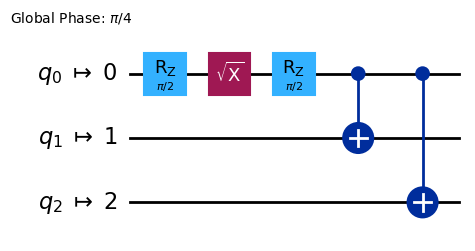

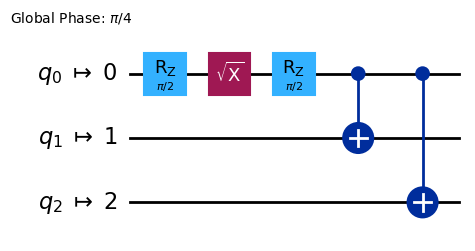

In [10]:
# Try to get a Fake backend for transpilation. Support multiple Qiskit versions.
FakeBackend = None
try:
    from qiskit.providers.fake_provider import GenericBackendV2 as _Fake
    FakeBackend = _Fake
except Exception:
    try:
        from qiskit.providers.fake_provider import GenericBackendV2 as _Fake
        FakeBackend = _Fake
    except Exception:
        FakeBackend = None

if FakeBackend is not None:
    backend = FakeBackend(3)
    print('Using fake backend:', type(backend).__name__)
    transpiled = transpile(qc_no_measure, backend=backend, optimization_level=1)
else:
    print('Fake backend not available; transpiling with default basis (u3,cx) as fallback')
    transpiled = transpile(qc_no_measure, basis_gates=['u3', 'cx'], optimization_level=1)

print('Transpiled circuit:')
display(transpiled.draw('mpl'))

# If you want to transpile for other fake backends, replace GenericBackendV2 with another FakeXXX class


## Exercise 5: Quantum Inspire (QX emulator)

Now that you have run the circuit on a local simulator, you can try to run it on Quantum Inspire's simulator. Take a look at the [Qiskit-QuantumInspire documentation](https://qutech-delft.github.io/qiskit-quantuminspire/getting_started/index.html). You need to create an account on [Quantum Inspire](https://www.quantum-inspire.com/), and then you need to install the `quantum-inspire` package using `pip`: 

1. `pip install qiskit-quantuminspire`
2. `pip install quantuminspire`

Login to Quantum Inspire using the following command. Open the link provided, and link your account.

In [ ]:
!qi login

You will run the entanglement circuit (`Exercise 2`) on the Quantum Inspire's simulator. Use the `qiskit-quantuminspire` package, which provides a Qiskit backend for Quantum Inspire. It would be interesting to first enumerate the possible backends that the Quantum Inspire provider offers, and then you can select the preferred simulator backend.

In [ ]:
from qiskit_quantuminspire.qi_provider import QIProvider
provider = QIProvider()
print(provider.backends())

Choose the correct backend name, that corresponds to the Quantum Inspire simulator, from the list. Then, copy your code from `Exercise 2`
 but change the backend to the Quantum Inspire simulator backend you just selected. Run the code and see if the output matches your expectations. 

In [ ]:
# Copy your code here

# Use the proper backend name
simulator_backend = provider.get_backend("QX emulator")

# Print the results from the Quantum Inspire backend
print(simulator_backend.run(qc, shots=1024).result().get_counts())

## Exercise 6: Quantum Inspire (Quantum Processor Tuna-9)

After you have tested the QX emulator from Quantum Inspire, it is time to test the actual quantum processor. Choose one of the available backends that corresponds to a real quantum computer, run the same circuit on it, and display the results.

**Note:** Running on a real quantum computer may take some time, as there may be a queue of jobs waiting to be executed. Be patient!

In [ ]:
tuna9_backend = provider.get_backend("Tuna-9")
results = tuna9_backend.run(qc, shots=1024).result().get_counts()

#### Exercises 5 and 6 are based on the work developed by Pascal van den Bosch (P.vandenBosch@hhs.nl), as part of the course Quantum Information and Algorithms from the Master on Applied Quantum Technology. Thanks to Pascal for granting his permission for this material to be distributed here.

In [ ]:
print('Software version:\n')
!pip list | grep "qiskit"
!pip list | grep "IBMQuantumExperience"
!python --version